In [1]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
# !pip install -U tensorflow==2.12.0rc0
# !pip install -U numpy==1.18.5

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re  
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 330.3 kB/s eta 0:00:02
     -------------------------- ----------- 450.6/636.8 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


In [5]:
dir_cs_aware_cleaned_text = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\RelevanceAnalysis\cs_aware_cleaned_text.csv'

cs_aware_cleaned_text = pd.read_csv(dir_cs_aware_cleaned_text)
print(cs_aware_cleaned_text.shape)

(17792, 4)


In [6]:
dir_not_cs_aware_cleaned_text = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\RelevanceAnalysis\not_cs_aware_cleaned_text.csv'

not_cs_aware_cleaned_text = pd.read_csv(dir_not_cs_aware_cleaned_text)
print(not_cs_aware_cleaned_text.shape)

(7020, 6)


In [7]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1) 
not_cs_aware_cleaned_text = not_cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1) 

In [8]:
cs_aware_cleaned_text

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1
17788,do not give an attacker the opportunity to tak...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1
17790,cisagov s known exploited vulnerabilities cata...,en,1


try to cathegorize

In [9]:
choices = {"malware":"Malware",
           "DoS":"DoS",
           "denial of service":"DoS",
           "ransomware":"ransomware",
           "Zero-day": "Zero-day Vulnerabilities",
           "software update": "Updates",
           "firewall":"Firewall Vulnerabilities",
           "LAN":"Network Vulnerabilities",
           "hardware": "hardware",
           
          }

In [10]:
df = cs_aware_cleaned_text
df

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1
17788,do not give an attacker the opportunity to tak...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1
17790,cisagov s known exploited vulnerabilities cata...,en,1


In [11]:
count = 0
df["category"] = df["full_text"].str.findall("|".join(choices.keys())).str.join(",").map(choices)
for i in range (0, len(df["category"])):
    if (df["category"][i] == "Firewall Vulnerabilities"):
        count += 1
print(count)

52


categorization ends here

In [12]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(labels=range(0, 11000), axis=0)
cs_aware_cleaned_text

,full_text,lang,Related,category
11000,windows gdi remote code execution vulnerability,en,1,NaN
11001,microsoft defender for endpoint tampering vuln...,en,1,NaN
11002,microsoft edge chromium based elevation of pri...,en,1,NaN
11003,microsoft edge chromium based elevation of pri...,en,1,NaN
11004,allocation of resources without limits or thro...,en,1,NaN
...,...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1,NaN
17788,do not give an attacker the opportunity to tak...,en,1,NaN
17789,check out cisagov s redeye it is an interactiv...,en,1,NaN
17790,cisagov s known exploited vulnerabilities cata...,en,1,NaN


In [13]:
# cs_aware_cleaned_text_plot

<Axes: title={'center': 'Percentage of Languages'}, ylabel='count'>

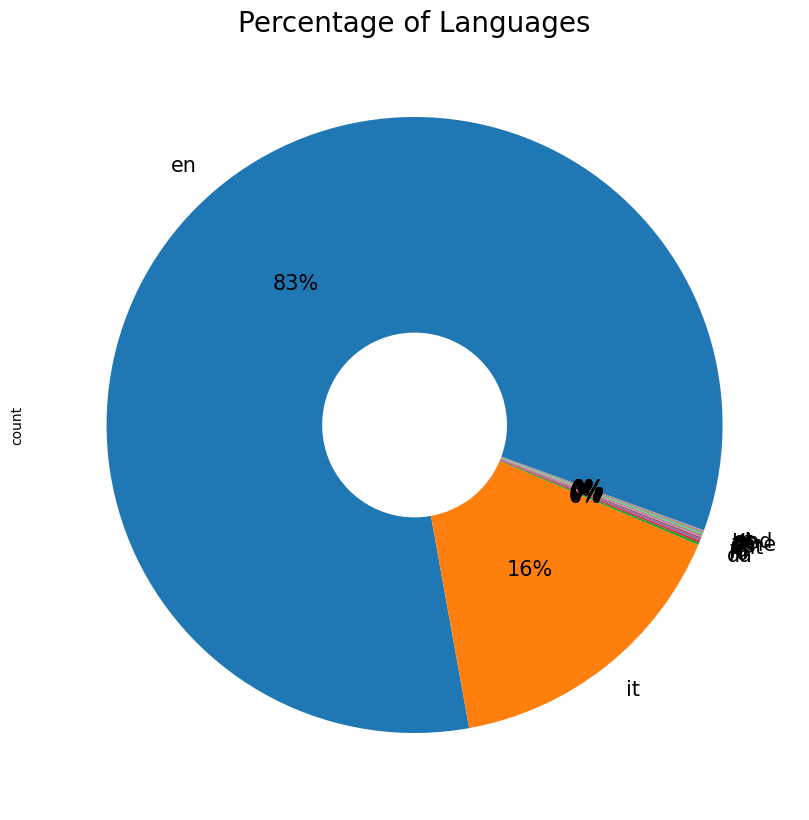

In [14]:
## check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Languages', fontsize=20)

cs_aware_cleaned_text.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7),   autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [15]:
not_cs_aware_cleaned_text

,full_text,lang,Polarity,Sentiment_Type,Related
0,youtube the world design of elden ring,ko,0.000000,NEUTRAL,0
1,rt mezzyali hoeybblessed mahran digger...,en,0.000000,NEUTRAL,0
2,rt jonahjmeyerhoff apply online for our nimh...,en,-0.033333,NEGATIVE,0
3,rt fashionpressnet ...,ja,0.000000,NEUTRAL,0
4,rt yunaussy since you all want to complain ...,en,0.000000,NEUTRAL,0
...,...,...,...,...,...
7015,tohkkis i draw s stick men w or l offer,en,0.000000,NEUTRAL,0
7016,it was in some such fashion that the world spo...,en,0.000000,NEUTRAL,0
7017,goog afternoon guys who wants to support my...,en,0.200000,POSITIVE,0
7018,robinhanson not convenient nor liquid in low ...,en,0.033333,POSITIVE,0


<Axes: title={'center': 'Percentage of Labels'}, ylabel='count'>

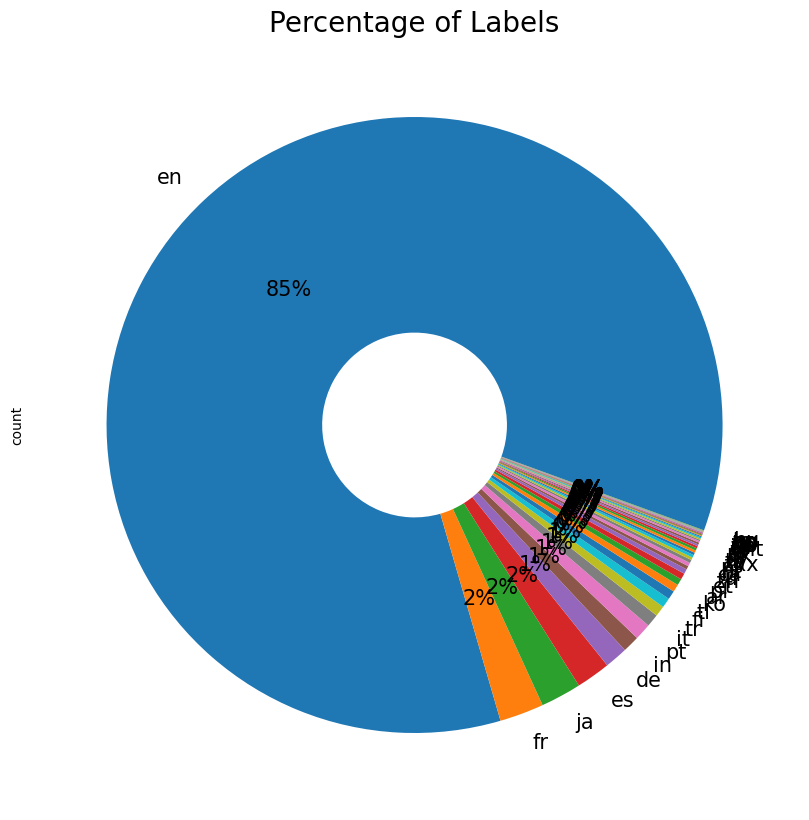

In [16]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
not_cs_aware_cleaned_text.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [17]:
not_cs_aware_cleaned_text = pd.DataFrame(not_cs_aware_cleaned_text, columns = ['full_text','lang', 'Related'])
cs_aware_data = pd.concat([cs_aware_cleaned_text, not_cs_aware_cleaned_text], ignore_index = True)
cs_aware_data

,full_text,lang,Related,category
0,windows gdi remote code execution vulnerability,en,1,NaN
1,microsoft defender for endpoint tampering vuln...,en,1,NaN
2,microsoft edge chromium based elevation of pri...,en,1,NaN
3,microsoft edge chromium based elevation of pri...,en,1,NaN
4,allocation of resources without limits or thro...,en,1,NaN
...,...,...,...,...
13807,tohkkis i draw s stick men w or l offer,en,0,NaN
13808,it was in some such fashion that the world spo...,en,0,NaN
13809,goog afternoon guys who wants to support my...,en,0,NaN
13810,robinhanson not convenient nor liquid in low ...,en,0,NaN


<Axes: title={'center': 'Percentage of Labels'}, ylabel='count'>

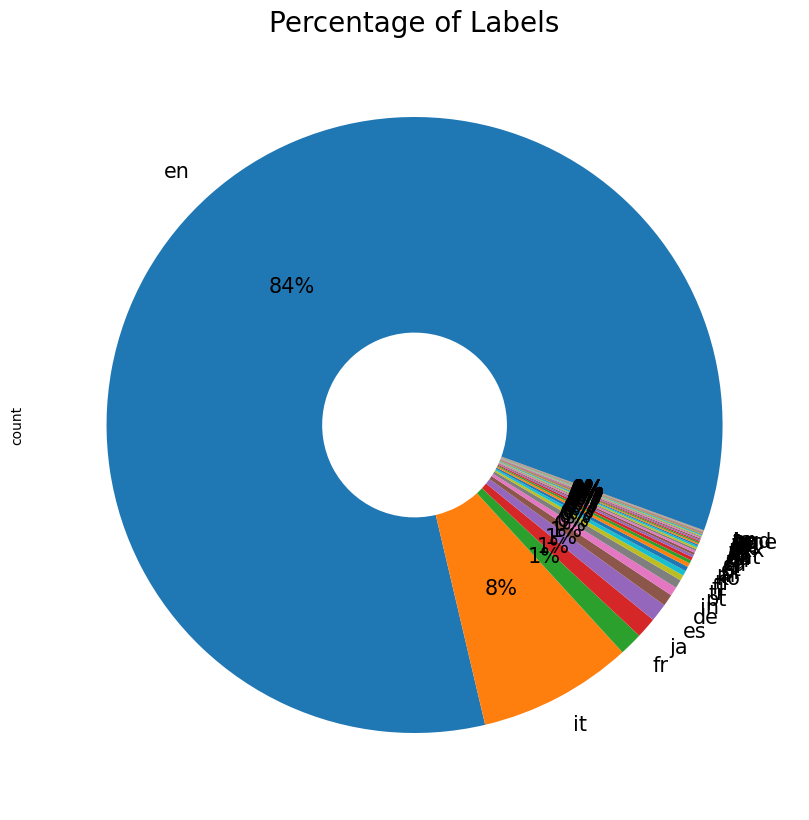

In [18]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
cs_aware_data.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

tokenize + embeddings

In [19]:
# pip install --upgrade tensorflow

In [22]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/128.9 kB ? eta -:--:--
   ---------------------------------------- 128.9/128.9 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for paramiko from https://files.pythonhosted.org/packages/ad/50/8792484502c8141c20c996b802fefa8435a9c018a2bb440a06b172782118/paramiko-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for cryptography from https://files.pythonhosted.org/packages/b2/ee/ffe0ba4c84a99cd78bd1dca90d2812c2f5378af0aec3e09e6bdfc9433d46/cryptography-42.0.1-cp39-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/225.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/225.9 kB ? eta -:--:--
   - -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 23.2.0 requires cryptography!=40.0.0,!=40.0.1,<42,>=38.0.0, but you have cryptography 42.0.1 which is incompatible.


In [23]:
import numpy as np 
import pandas as pd 
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP  
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
import re  

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


In [25]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

<Axes: title={'center': 'Percentage of Labels'}, ylabel='count'>

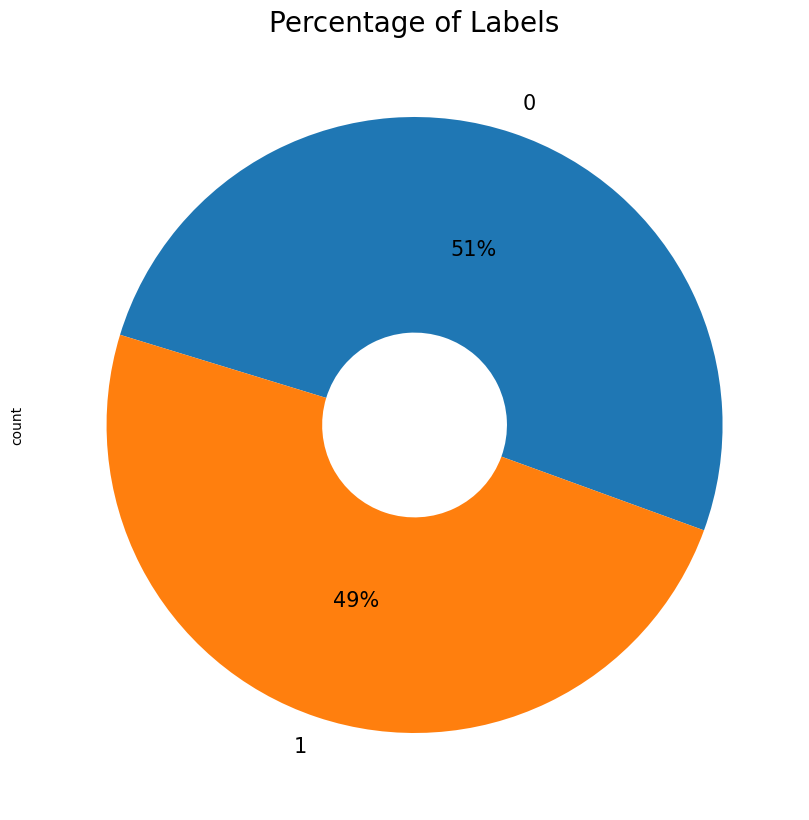

In [27]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
cs_aware_data.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [28]:
cs_aware_data = cs_aware_data.drop_duplicates(subset=['full_text'])
print(cs_aware_data) 
cs_aware_data.to_csv('cs_aware.csv')

                                               full_text lang  Related  \
0        windows gdi remote code execution vulnerability   en        1   
1      microsoft defender for endpoint tampering vuln...   en        1   
2      microsoft edge chromium based elevation of pri...   en        1   
4      allocation of resources without limits or thro...   en        1   
5      system center operations manager open manageme...   en        1   
...                                                  ...  ...      ...   
13807          tohkkis i draw   s stick men w or l offer   en        0   
13808  it was in some such fashion that the world spo...   en        0   
13809  goog afternoon   guys  who wants to support my...   en        0   
13810   robinhanson not convenient nor liquid in low ...   en        0   
13811  this really just paid my rent    chrissypodola...   en        0   

      category  
0          NaN  
1          NaN  
2          NaN  
4          NaN  
5          NaN  
...      

LASER

In [37]:
!pip install torch==

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device




  Using cached torch-2.0.0-cp311-cp311-win_amd64.whl (172.3 MB)


In [35]:
!pip install -q laserembeddings==1.1.2
!pip install -q ftfy

Impossibile trovare il file specificato.


In [34]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote

ModuleNotFoundError: No module named 'laserembeddings'

****LASER Embeddings****
This encodes each of the strings as a LASER embedding (1024 dimentional vector)

In [ ]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [ ]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [ ]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together 
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()
    
    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)
    
    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)
        
    return embedding

THE MODEL

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(cs_aware_data['full_text'], cs_aware_data['Related'], test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


In [ ]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

In [ ]:
X_train =laser_encode(X_train)
X_val = laser_encode(X_val)
X_test = laser_encode(X_test)

In [ ]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

In [ ]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [ ]:
import tensorflow as tf


In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ tf.keras.metrics.BinaryAccuracy() ])
print(model.summary())

In [ ]:
epochs = 1000
batch_size = 32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)


In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.2, 
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

In [ ]:
model.evaluate(X_test, y_test, verbose =1)


In [ ]:
print(history.history.keys())


In [ ]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

In [ ]:
history.history['binary_accuracy']

In [ ]:
model.save('laser2.h5')


In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

In [ ]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else: 
        prediction[i] = 1

In [ ]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

In [ ]:
# from mlxtend.evaluate import accuracy_score

# std_acc = accuracy_score(y_test, prediction)
# bin_acc = accuracy_score(y_test, prediction, method='binary', pos_label=1)
# avg_acc = accuracy_score(y_test, prediction, method='average')

# print(f'Standard accuracy: {std_acc*100:.2f}%')
# # print(f'Class 1 accuracy: {bin_acc*100:.2f}%')
# print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

In [ ]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)